## Install Dependencies

In [15]:
#!pip install opencv-python
#!pip install matplotlib
#!pip install scipy
#!pip list

# Problem 1
Some description

# Python Imports Explanation

This code imports several essential libraries for image processing, scientific computing, and data visualization:

## Computer Vision
```python
import cv2  # OpenCV - Main computer vision library
Purpose: Image/video processing, object detection, feature extraction

Common uses: Reading images (cv2.imread()), displaying images (cv2.imshow()), edge detection, face recognition

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from scipy import fftpack

In [25]:
def show_image(title, image, cmap=None, pause=3):
    """Display image in non-blocking way for screenshots"""
    plt.figure(figsize=(8, 6))
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show(block=False)
    plt.pause(pause)
    plt.close()

def get_image_path(filename):
    return os.path.join('images', filename)

## Image Display Function: `show_image()`

**Purpose:**  
Displays images temporarily in a non-blocking way, ideal for demonstrations and screenshots.



=== PROBLEM 1 SOLUTION ===


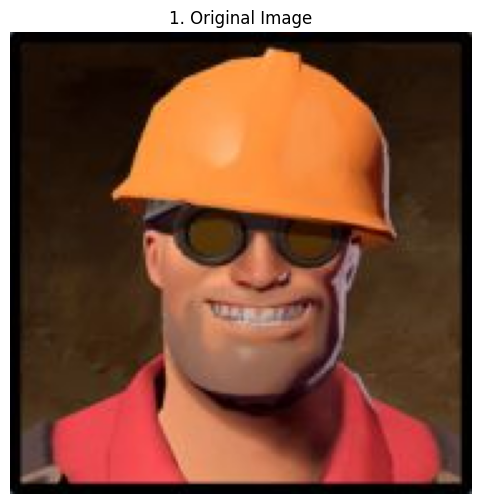

2. Center coordinates (y,x): (92, 92)
   Center intensity (BGR): [ 67  92 172]
4. Patch center intensity: [168 158  50]


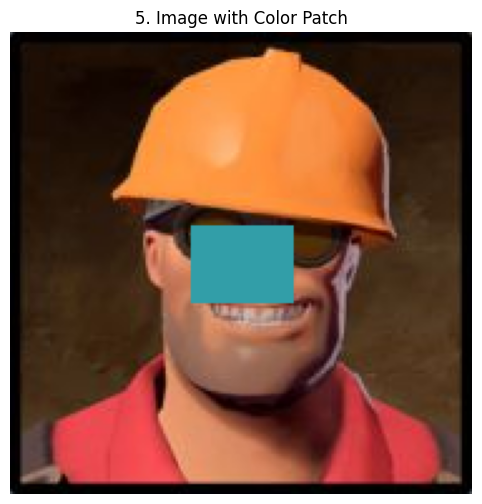

In [26]:
def problem1():
    print("\n=== PROBLEM 1 SOLUTION ===")
    img_path = get_image_path('tf2_engineer.jpg')
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error loading {img_path}")
        return
    show_image("1. Original Image", img)
    height, width = img.shape[:2]
    yc, xc = height // 2, width // 2
    print(f"2. Center coordinates (y,x): ({yc}, {xc})")
    print(f"   Center intensity (BGR): {img[yc, xc]}")
    patch_color = (0xA8, 0x9E, 0x32)
    patch_height, patch_width = 30, 40
    start_point = (xc - patch_width // 2, yc - patch_height // 2)
    end_point = (xc + patch_width // 2, yc + patch_height // 2)
    img_patched = img.copy()
    cv2.rectangle(img_patched, start_point, end_point, patch_color, -1)
    print(f"4. Patch center intensity: {img_patched[yc, xc]}")
    show_image("5. Image with Color Patch", img_patched)

problem1()




### Problem 2 Image Processing Code Explanation
The purpose of this code is to demonstrate image negation by:

Loading a grayscale image (Einstein portrait)

Creating its photographic negative (inverting pixel values)

Displaying both versions side-by-side



=== PROBLEM 2 SOLUTION ===
Loading image from: images\einstein.tif


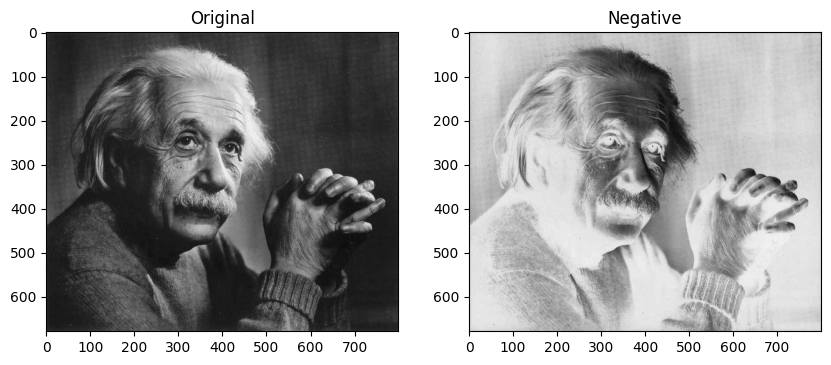

In [ ]:

 %matplotlib inline

def problem2():
    print("\n=== PROBLEM 2 SOLUTION ===")
    img_path = get_image_path('einstein.tif')
    print(f"Loading image from: {img_path}")  # Debug print
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error loading {img_path}")
        return
    
    plt.figure(figsize=(10,4))
    plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(255-img, 'gray'), plt.title('Negative')
    plt.show()
problem2()

# Problem 3 Image Processing Code Explanation
The show_image() helper function (not shown here) handles the actual display mechanics while this function focuses on the processing logic.



=== PROBLEM 3 SOLUTION ===


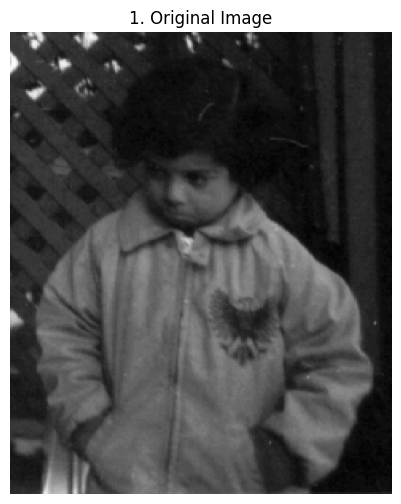

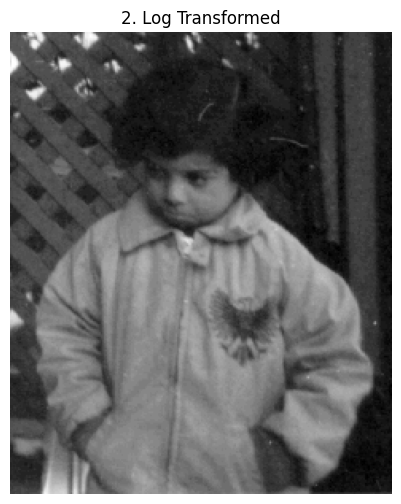

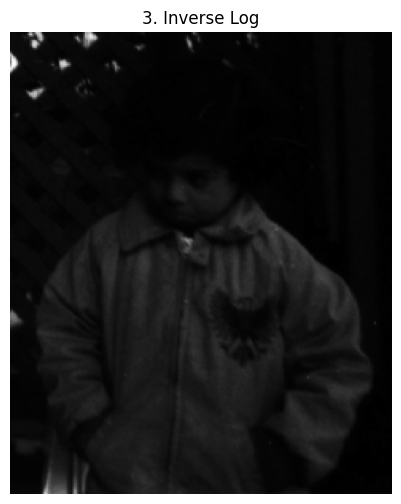

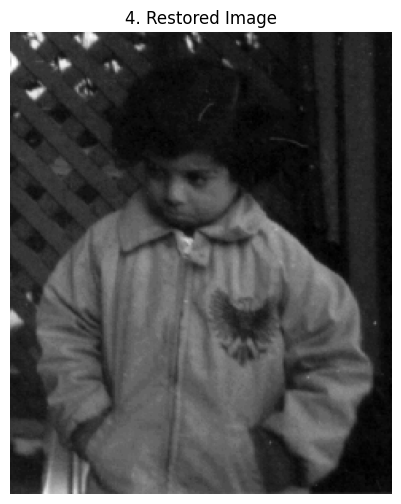


5. Analysis:
- Log transform enhances dark regions
- Restoration shows minor quality loss


In [ ]:
# Add this at the VERY TOP of your notebook (before any other code)
%matplotlib inline
import matplotlib.pyplot as plt
plt.ion()  # Turn on interactive mode

# Then run your existing problem3() function exactly as is
def problem3():
    print("\n=== PROBLEM 3 SOLUTION ===")
    img_path = os.path.join('images', 'pout .tif')  # Space included
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error loading {img_path}")
        return
    show_image("1. Original Image", img, 'gray')
    img_float = img.astype(np.float32) + 1
    c = 255 / np.log(1 + np.max(img_float))
    log_transformed = c * np.log(img_float)
    log_transformed = np.uint8(log_transformed)
    show_image("2. Log Transformed", log_transformed, 'gray')
    inv_log = np.exp(img.astype(np.float32) / c) - 1
    inv_log = np.uint8(cv2.normalize(inv_log, None, 0, 255, cv2.NORM_MINMAX))
    show_image("3. Inverse Log", inv_log, 'gray')
    restored = np.exp(log_transformed.astype(np.float32) / c) - 1
    restored = np.uint8(cv2.normalize(restored, None, 0, 255, cv2.NORM_MINMAX))
    show_image("4. Restored Image", restored, 'gray')
    print("\n5. Analysis:")
    print("- Log transform enhances dark regions")
    print("- Restoration shows minor quality loss")

problem3()
   

# Problem 4 Image Sharpening Analysis (`problem4()`)

This code demonstrates two approaches to unsharp masking (image sharpening):
1. **Spatial domain** processing (using Gaussian blur)
2. **Frequency domain** processing (using Fourier transform)




=== PROBLEM 4 SOLUTION ===


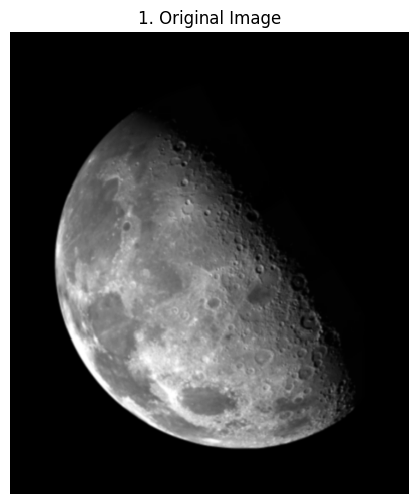

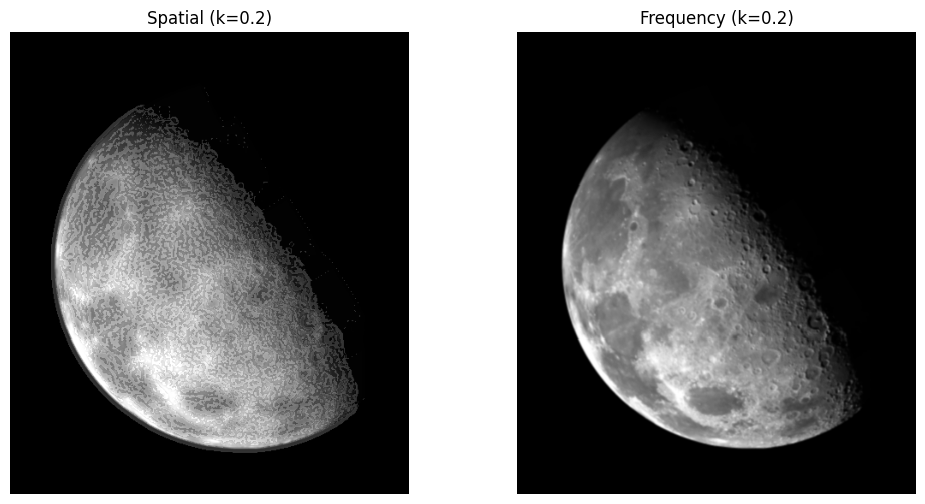

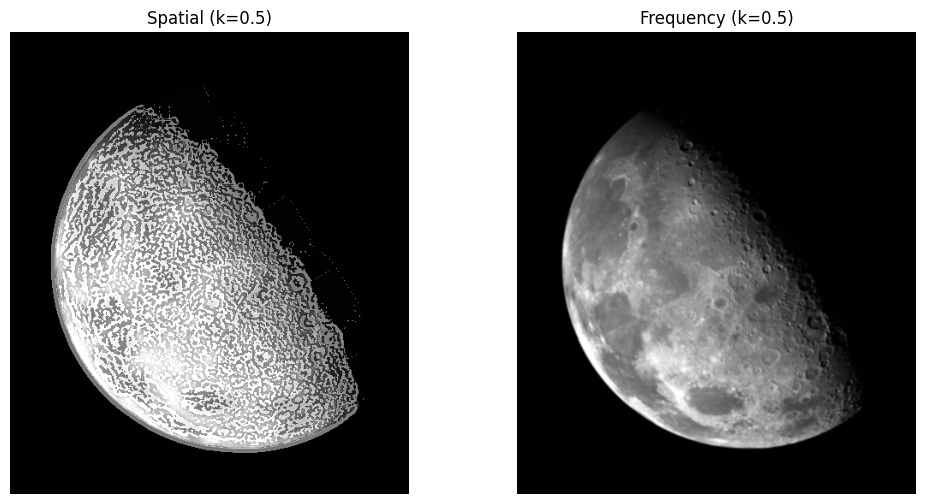

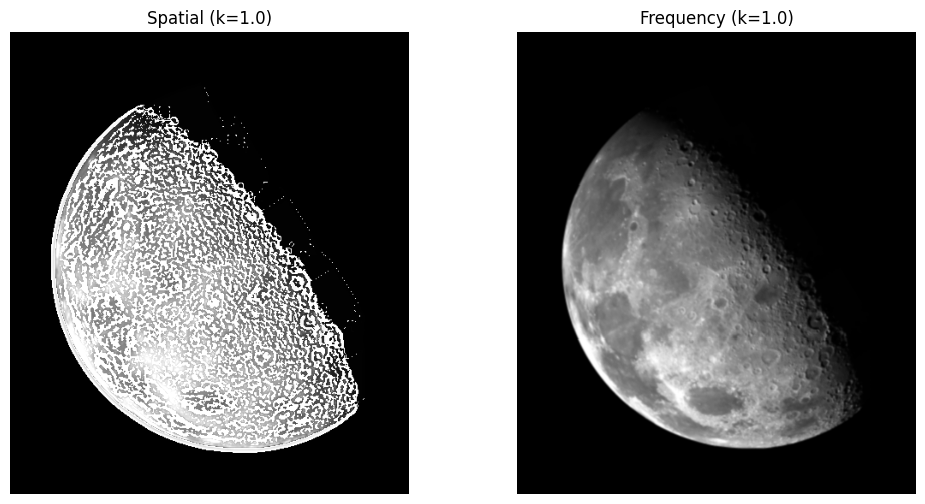

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.ion()  # Turn on interactive mode

# Then run your existing problem4() function exactly as is
def problem4():
    print("\n=== PROBLEM 4 SOLUTION ===")
    img_path = get_image_path('moon.tif')
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error loading {img_path}")
        return
    show_image("1. Original Image", img, 'gray')

    def spatial_unsharp(img, k):
        blurred = cv2.GaussianBlur(img, (9, 9), 2)
        mask = img - blurred
        return cv2.addWeighted(img, 1, mask, k, 0)

    def frequency_unsharp(img, k, D0=30):
        dft = np.fft.fft2(img)
        dft_shift = np.fft.fftshift(dft)
        rows, cols = img.shape
        crow, ccol = rows // 2, cols // 2
        y, x = np.ogrid[:rows, :cols]
        mask = 1 - np.exp(-((x - ccol) * 2 + (y - crow) * 2) / (2 * D0 ** 2))
        filtered = dft_shift * (1 + k * mask)
        idft = np.fft.ifft2(np.fft.ifftshift(filtered))
        return np.uint8(np.abs(idft))

    k_values = [0.2, 0.5, 1.0]
    for k in k_values:
        spatial = spatial_unsharp(img, k)
        freq = frequency_unsharp(img, k)
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].imshow(spatial, cmap='gray')
        ax[0].set_title(f"Spatial (k={k})")
        ax[1].imshow(freq, cmap='gray')
        ax[1].set_title(f"Frequency (k={k})")
        [a.axis('off') for a in ax]
        plt.show(block=False)
        plt.pause(3)
        plt.close()

problem4()

# Problem 5 Image Denoising Analysis (problem5())

This code performs salt-and-pepper noise detection and removal on a PCB image through histogram analysis and median filtering.



=== PROBLEM 5 SOLUTION ===


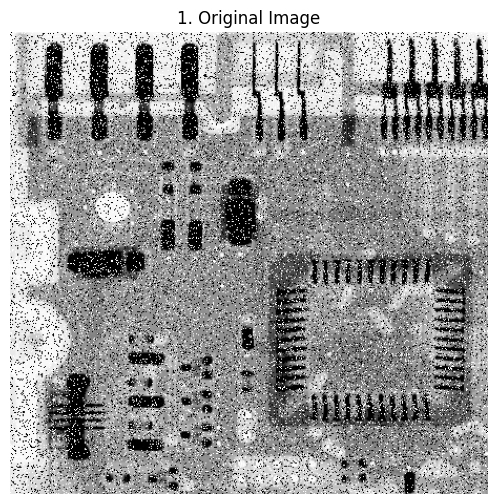

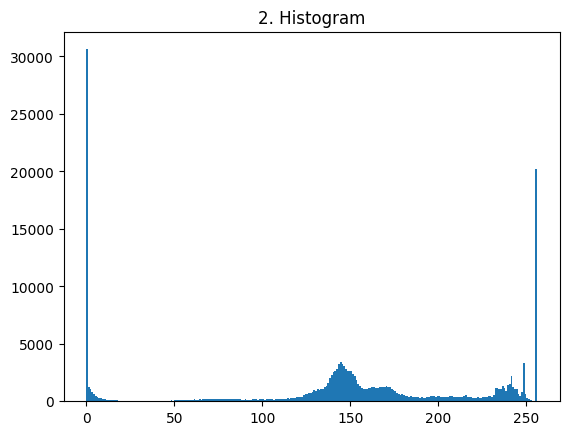


2. Noise Analysis:
- Salt-and-pepper noise detected
- Histogram shows spikes at 0 and 255


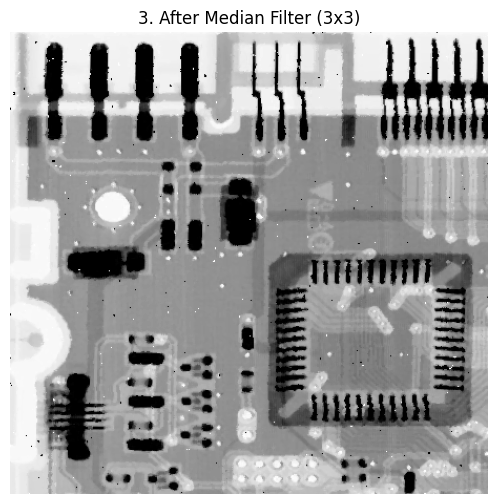


3. Filtering Results:
Noisy pixels before: 50826
Noisy pixels after: 12218


In [48]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.ion()  # Turn on interactive mode
def problem5():
    print("\n=== PROBLEM 5 SOLUTION ===")
    img_path = get_image_path('pcb.tif')
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error loading {img_path}")
        return
    show_image("1. Original Image", img, 'gray')
    plt.hist(img.ravel(), 256, [0, 256])
    plt.title("2. Histogram")
    plt.show(block=False)
    plt.pause(2)
    plt.close()
    print("\n2. Noise Analysis:")
    print("- Salt-and-pepper noise detected")
    print("- Histogram shows spikes at 0 and 255")
    denoised = cv2.medianBlur(img, 3)
    show_image("3. After Median Filter (3x3)", denoised, 'gray')
    print("\n3. Filtering Results:")
    print(f"Noisy pixels before: {np.sum((img == 0) | (img == 255))}")
    print(f"Noisy pixels after: {np.sum((denoised == 0) | (denoised == 255))}")
problem5()

# Problem 6 Image Contrast Enhancement (problem6())
Purpose: Compare two image contrast enhancement methods:

Global Equalization - Boosts overall contrast

CLAHE - Improves local details while preventing over-enhancement
In conclusion, it Shows original , enhanced images , Displays histograms , and lastly Compares results.







=== PROBLEM 6 SOLUTION ===


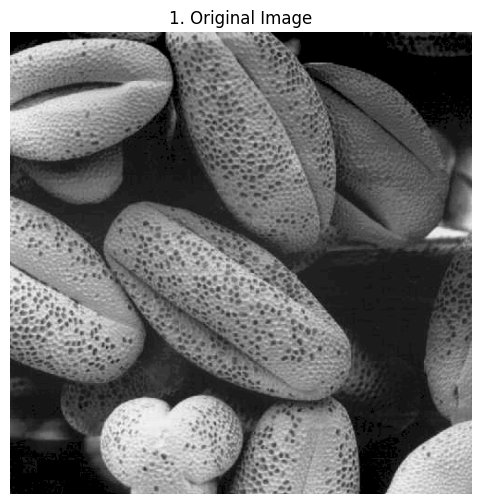

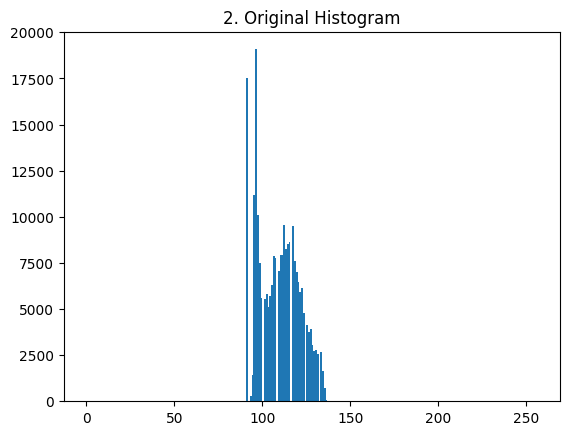


2. Problem Analysis:
- Low contrast (values clustered around 50-150)


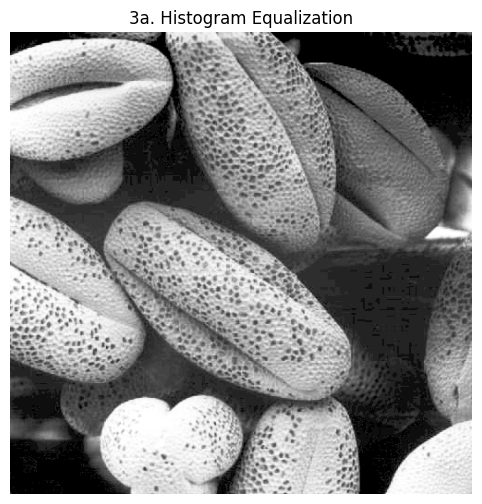

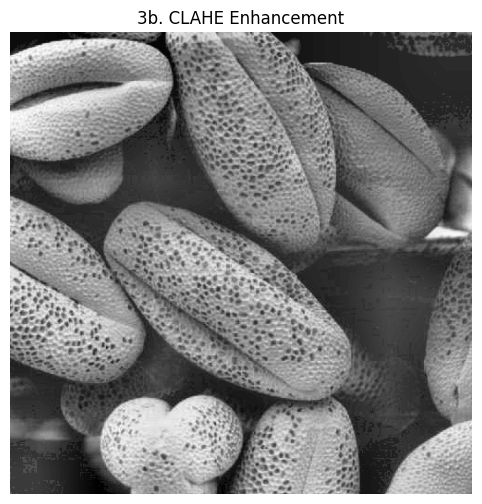


5. Comparison:
- Equalization spreads values globally
- CLAHE preserves local contrast better


In [49]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.ion()  # Turn on interactive mode
from IPython.display import display, clear_output

def problem6():
    print("\n=== PROBLEM 6 SOLUTION ===")
    img_path = get_image_path('pollen.tif')
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error loading {img_path}")
        return
    show_image("1. Original Image", img, 'gray')
    plt.hist(img.ravel(), 256, [0, 256])
    plt.title("2. Original Histogram")
    plt.show(block=False)
    plt.pause(2)
    plt.close()
    print("\n2. Problem Analysis:")
    print("- Low contrast (values clustered around 50-150)")
    equalized = cv2.equalizeHist(img)
    show_image("3a. Histogram Equalization", equalized, 'gray')
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(img)
    show_image("3b. CLAHE Enhancement", clahe_img, 'gray')
    print("\n5. Comparison:")
    print("- Equalization spreads values globally")
    print("- CLAHE preserves local contrast better")
problem6()